In [1]:
from tqdm.auto import tqdm
import torchvision.models.resnet as resnet
import torch
import os
import argparse
from dotenv import load_dotenv, find_dotenv
from src.data.dataloader import UseMetaData, ValTransforms
from torch.utils.data import DataLoader
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from lazypredict.Supervised import LazyClassifier
import sklearn
from sklearn.model_selection import train_test_split
import xgboost as xgb



/Users/carlschmidt/anaconda3/envs/bach/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
val_preds  = pickle.load(open('../../val_preds.pkl', 'rb'))

val_img_preds = []
val_img_truth = []

for i in val_preds.keys():
   val_img_preds.append(torch.argmax(torch.from_numpy(val_preds[i][0]), dim=1))
   val_img_truth.append(torch.from_numpy(val_preds[i][2]))

all_truths = torch.cat(val_img_truth).numpy()
all_preds = torch.cat(val_img_preds).numpy()

#accuracy
print('Accuracy: ', sklearn.metrics.accuracy_score(all_truths, all_preds))

Accuracy:  0.005077046405985571


In [49]:
path = '../../data/annotations/imagenet_x_train_multi_factor.jsonl'

In [51]:
df = pd.read_json(path, lines=True)

3

In [2]:
dotenvpath = find_dotenv()
load_dotenv(dotenvpath)

annotation_path = '../../data/annotations/'
path = '/mnt/f/MetalabelIntegration/'

train_data = UseMetaData(
        "train", path, annotation_path, transform=ValTransforms()
    )
val_data = UseMetaData("val", path, annotation_path, transform=ValTransforms())
    
number_of_classes = len(train_data.classes)

train_loader = DataLoader(
        train_data,
        batch_size=8,
        num_workers=8,
    )

val_loader = DataLoader(
        val_data,
        batch_size=8,
        num_workers=4,
    )

In [33]:
val_loader.dataset[3]

(tensor([[[-1.3473, -1.3987, -1.3987,  ..., -1.2103, -1.2274, -1.2274],
          [-1.2959, -1.3130, -1.3130,  ..., -1.2103, -1.1760, -1.1589],
          [-1.2788, -1.2788, -1.2445,  ..., -1.2103, -1.1760, -1.1418],
          ...,
          [-2.0665, -2.1008, -2.0837,  ..., -1.8953, -1.9124, -1.8953],
          [-2.0837, -2.0837, -2.1008,  ..., -1.8610, -1.8610, -1.8439],
          [-2.1008, -2.1008, -2.1008,  ..., -1.8610, -1.8439, -1.8610]],
 
         [[ 1.0805,  1.0805,  1.0980,  ..., -0.6001, -0.6001, -0.6001],
          [ 1.1155,  1.1506,  1.1506,  ..., -0.6176, -0.6001, -0.5826],
          [ 1.1331,  1.1506,  1.1155,  ..., -0.6176, -0.6001, -0.5476],
          ...,
          [-2.0357, -2.0357, -2.0182,  ..., -1.9132, -1.8782, -1.9307],
          [-2.0357, -2.0182, -2.0357,  ..., -1.9657, -1.9307, -1.9482],
          [-2.0357, -2.0182, -2.0357,  ..., -2.0182, -2.0182, -2.0182]],
 
         [[ 1.4025,  1.3677,  1.3677,  ...,  0.1302,  0.1302,  0.1476],
          [ 1.4025,  1.4200,

In [15]:
print(len(val_loader.dataset.class_to_idx))
print(len(train_loader.dataset.class_to_idx))

999
999


In [ ]:
len()

In [11]:
val_loader.dataset[6000]

(tensor([[[ 2.0777,  2.0777,  2.0948,  ...,  2.1462,  2.1804,  2.1633],
          [ 2.1119,  2.0948,  2.0948,  ...,  2.1290,  2.1633,  2.1462],
          [ 2.1290,  2.0948,  2.1119,  ...,  2.1462,  2.1290,  2.1804],
          ...,
          [-0.3369, -0.2684, -0.1828,  ...,  0.9646,  0.9817,  1.0159],
          [-0.5938, -0.4397, -0.2513,  ...,  0.9646,  0.9817,  0.9132],
          [-1.8439, -1.5357, -1.1932,  ...,  1.4269,  1.5297,  1.0331]],
 
         [[ 2.3936,  2.3936,  2.4111,  ...,  2.0434,  2.0959,  2.0959],
          [ 2.3936,  2.3936,  2.3936,  ...,  2.0434,  2.0784,  2.0784],
          [ 2.3936,  2.3936,  2.3761,  ...,  1.9909,  2.0259,  2.0084],
          ...,
          [-0.0224, -0.0224,  0.0301,  ...,  0.8004,  0.8004,  0.8179],
          [-0.2150, -0.0224,  0.0826,  ...,  0.8529,  0.7829,  0.8179],
          [-1.6331, -1.3004, -0.8978,  ...,  1.2206,  1.1155,  0.8529]],
 
         [[ 2.2740,  2.1868,  2.2566,  ...,  1.7860,  1.8383,  1.8557],
          [ 2.2914,  2.3263,

In [32]:
np.shape(val_dict[0][1])

(8, 16)

# Training and testing

**Kan ikke huske er embeddings lavet med et forward pass på de 50.000 billeder?**
**Måske stadig spørge Nicki om hans approach med at lave embeddings på 50.000 images, for derefter 

In [2]:
val_dict = pickle.load(open('../../data/train_embeddings.pkl', 'rb')) # De 50.000 billeder
#val_dict = pickle.load(open('../../data/val_embeddings.pkl', 'rb'))

In [13]:
val_dict[0][0]

array([[1.3433844 , 0.17441927, 1.7837598 , ..., 0.07956456, 0.11728598,
        0.83721125],
       [0.7219721 , 1.2102747 , 0.7870118 , ..., 0.3597971 , 0.14651966,
        0.45646465],
       [0.05431684, 0.09599383, 0.3473871 , ..., 0.24399187, 0.37392047,
        0.08033226],
       ...,
       [0.12876727, 0.32736042, 0.0716015 , ..., 0.18868539, 0.6687686 ,
        0.2971885 ],
       [0.0243606 , 0.2680786 , 0.10872113, ..., 0.03809149, 0.        ,
        0.3502503 ],
       [0.20314777, 0.14395699, 0.13556641, ..., 0.1184201 , 0.51048464,
        0.47193465]], dtype=float32)

In [5]:
# train_img_data = []
# train_meta_data = []
# train_labels = []

val_img_data = []
val_meta_data = []
val_labels = []

# for i in train_dict.keys():
#     train_img_data.append(torch.from_numpy(train_dict[i][0]))
#     train_meta_data.append(torch.from_numpy(train_dict[i][1]))
#     train_labels.append(torch.from_numpy(train_dict[i][2]))

for i in val_dict.keys():
    val_img_data.append(torch.from_numpy(val_dict[i][0]))
    val_meta_data.append(torch.from_numpy(val_dict[i][1]))
    val_labels.append(torch.from_numpy(val_dict[i][2]))

In [6]:
# train_img_data = torch.cat(train_img_data, 0).detach()
# train_meta_data = torch.cat(train_meta_data, 0)
# train_cat_data = torch.cat([train_img_data, train_meta_data], 1).numpy()
# train_labels = torch.cat(train_labels, 0).numpy()

In [7]:
val_img_data = torch.cat(val_img_data, 0).detach()
val_meta_data = torch.cat(val_meta_data, 0)
val_cat_data = torch.cat([val_img_data, val_meta_data], 1).numpy()
val_labels = torch.cat(val_labels, 0).numpy()

In [8]:
# all_cat_data = np.concatenate([train_cat_data, val_cat_data], 0)
# all_labels = np.concatenate([train_labels, val_labels], 0)
# all_img_data = np.concatenate([train_img_data, val_img_data], 0)

#### using k=?-split

In [9]:
def test_classifier_XXX(classifier, X_train_cat, y_train_cat, X_test_cat, y_test_cat):

    clf_cat = classifier()
    clf_img = classifier()

    clf_cat.fit(X_train_cat, y_train_cat)

    y_pred_cat = clf_cat.predict(X_test_cat)

    accuracy_cat = sklearn.metrics.accuracy_score(y_test_cat, y_pred_cat)

    print('Accuracy cat: ', sklearn.metrics.accuracy_score(y_test_cat, y_pred_cat))

    return clf_cat, clf_img, y_pred_cat, accuracy_cat

def test_classifier_fold(classifier, X_train_cat, y_train_cat, X_test_cat, y_test_cat, X_train_img, y_train_img, X_test_img, y_test_img):

    clf_cat = classifier()
    clf_img = classifier()

    clf_cat.fit(X_train_cat, y_train_cat)
    clf_img.fit(X_train_img, y_train_img)

    y_pred_cat = clf_cat.predict(X_test_cat)
    y_pred_img = clf_img.predict(X_test_img)

    accuracy_cat = sklearn.metrics.accuracy_score(y_test_cat, y_pred_cat)
    accuracy_img = sklearn.metrics.accuracy_score(y_test_img, y_pred_img)

    print('Accuracy cat: ', sklearn.metrics.accuracy_score(y_test_cat, y_pred_cat))
    print('Accuracy img: ', sklearn.metrics.accuracy_score(y_test_img, y_pred_img))

    return clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img


In [10]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar



X = val_cat_data

N_splits = 5
kf = KFold(n_splits=N_splits)
kf.get_n_splits(X)

print(kf)

df_acc = pd.DataFrame(columns=['Using Meta', 'Just images', 'Delta', 'McNemar p-value'])
M_table_cumm = np.zeros((2,2))
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i + 1}:")
    _,_, y_pred_cat, y_pred_img, acc_cat, acc_img = test_classifier_fold(classifier=xgb.XGBClassifier,
                                                      X_train_cat = val_cat_data[train_index],
                                                        y_train_cat = val_labels[train_index],
                                                          X_test_cat = val_cat_data[test_index],
                                                            y_test_cat = val_labels[test_index], 
                                                              X_train_img = val_img_data[train_index],
                                                                y_train_img = val_labels[train_index],
                                                                  X_test_img = val_img_data[test_index],
                                                                    y_test_img = val_labels[test_index])
    # Run a mcnemar test for the two classifiers
    M_table = mcnemar_table(y_target= val_labels[test_index],
                             y_model1 = y_pred_cat,
                              y_model2 = y_pred_img)
    M_table_cumm += M_table
    chi2, p = mcnemar(ary=M_table, corrected=True)
    # append accuracies to df_acc
    df_acc.loc[i] = [acc_cat, acc_img, acc_cat- acc_img, p]

print(df_acc)
print('------------Cummulated McNemar test------------')
print(mcnemar(ary=M_table, corrected=True))
    

KFold(n_splits=5, random_state=None, shuffle=False)
Fold 1:


#### Using k=1-split

In [8]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(val_cat_data, val_labels, test_size=0.2, random_state=42)
X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(val_img_data, val_labels, test_size=0.2, random_state=42)

# https://stackoverflow.com/questions/49134338/kfolds-cross-validation-vs-train-test-split

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img = test_classifier(KNeighborsClassifier)

Fitting classifier 1 - cat
Fitting classifier 2 - img
Accuracy cat:  0.6633926744423982
Accuracy img:  0.6621649273582976


In [53]:
clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img = test_classifier(LogisticRegression)

Accuracy cat:  0.7200736648250461
Accuracy img:  0.7160834868017188


In [56]:
clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img = test_classifier(xgb.XGBClassifier)

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img = test_classifier(RandomForestClassifier)

Fitting classifier 1 - cat


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img = test_classifier(DecisionTreeClassifier)

In [75]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_img_data, train_labels)
preds = classifier.predict(val_img_data)
print((preds == val_labels).mean())

0.006145898280929901


In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(val_cat_data, val_labels)

ValueError: X has 2064 features, but KNeighborsClassifier is expecting 2048 features as input.

In [43]:
preds = clf.predict(val_cat_data)
print((preds == val_labels).mean())

0.9998772202668413


In [44]:
clf = LogisticRegression()
clf.fit(val_img_data, val_labels)
preds = clf.predict(val_img_data)
print((preds == val_labels).mean())

0.9994474912007858


### RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_img, y_train_img)
preds = classifier.predict(X_test_img)
print((preds == y_test_img).mean())

KeyboardInterrupt: 

### DecisionTreeClassifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

for train_data in tqdm([train_img_data, train_cat_data]):
    classifier = DecisionTreeClassifier(random_state=0)
    classifier.fit(train_data.numpy(), train_labels.numpy())
    preds = classifier.predict(train_data.numpy())
    acc = (preds == train_labels.numpy()).mean()
    print(acc)

  0%|          | 0/2 [00:00<?, ?it/s]

### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
for train_data in tqdm([train_img_data, train_cat_data]):
    classifier = GaussianNB()
    classifier.fit(train_data.numpy(), train_labels.numpy())
    preds = classifier.predict(train_data.numpy())
    acc = (preds == train_labels.numpy()).mean()
    print(acc)

  0%|          | 0/2 [08:12<?, ?it/s]


KeyboardInterrupt: 

# PCA 

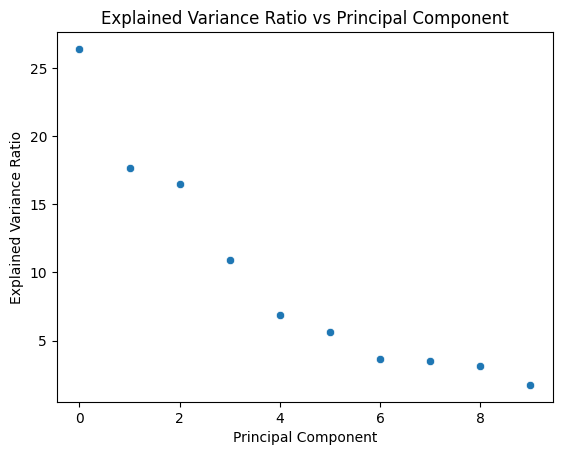

In [31]:
from sklearn.decomposition import PCA
X = train_meta_data   #train_cat_data
pca = PCA(n_components=10)
pca.fit(X)

sns.scatterplot(pca.explained_variance_ratio_*100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Principal Component')
plt.show()



# Getting metalabel tabular data


In [7]:
dotenvpath = find_dotenv()
load_dotenv(dotenvpath)

annotation_path = "../../data/annotations/"
path = '/mnt/f/MetalabelIntegration/'

In [9]:
train_data = UseMetaData(
        "train", path, annotation_path, transform=ValTransforms()
    )
val_data = UseMetaData("val", path, annotation_path, transform=ValTransforms())
    
number_of_classes = len(train_data.classes)

train_loader = DataLoader(
        train_data,
        batch_size=16,
        num_workers=8,
        pin_memory=True,
        shuffle=True,
    )

val_loader = DataLoader(
        val_data,
        batch_size=16,
        num_workers=8,
        pin_memory=True,
        shuffle=True,
    )

In [10]:
model = torch.hub.load(
                "pytorch/vision:v0.9.0",
                "resnet50",
                weights="ResNet50_Weights.IMAGENET1K_V1",
            )
model.fc = torch.nn.Identity()
model.eval()

Using cache found in /home/juliu/.cache/torch/hub/pytorch_vision_v0.9.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
train_img_data = []
train_meta_data = []
train_labels = []

for i, batch in enumerate(tqdm.tqdm(train_loader)):
    train_img_data.append(model(batch[0]))
    train_meta_data.append(batch[1])
    train_labels.append(batch[2])
    if i > 100:
        break

train_img_data = torch.cat(train_img_data, 0).detach()
train_meta_data = torch.cat(train_meta_data, 0)
train_cat_data = torch.cat([train_img_data, train_meta_data], 1)
train_labels = torch.cat(train_labels, 0)